In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
import time
from tweepy import OAuthHandler

In [3]:
import datetime

In [4]:
ckey = 'OWea1JDj2RMgv9ktXcKkM3CRI'
csecret = 'zolroSpEUpqFrTABaVHttXDYrKAIWBBGPpFjXZ5j4r201obVWq'
atoken = '927171157018759173-tqtWOcZMkWsnCvUToWsR3W0qSp64jwm'
asecret = 'qMvXFuUpsnZD3b2TB1O49aGLSU6p607hDBnzkaYCdJWxR'

In [5]:
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

In [6]:
api = tweepy.API(auth)

### Create Functions to Get Tweets

In [7]:
def get_tweets(query, maxtweets):
    outtweets = [[time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet._json['created_at'],'%a %b %d %H:%M:%S +0000 %Y')),
                  tweet._json['created_at'][0:3], 
                  tweet._json["user"]["screen_name"], 
                  tweet._json["text"],
                  tweet._json["source"].split("\u003e")[1].split("</a\u003c\/a\u003e")[0][:-3], 
                  tweet._json['user']['location'],
                  tweet._json["retweet_count"],
                  tweet._json['favorite_count'],
                  tweet._json['user']['followers_count'],
                  tweet._json['user']['friends_count'],
                  tweet._json['user']['favourites_count']] for tweet in tweepy.Cursor(api.search, q=query,lang = "en", rpp=100).items(maxtweets)]
    return outtweets

In [8]:
def get_all_tweets(queries, maxtweets):
    tweets = []
    for query in queries:
        tweets = tweets + get_tweets(query, maxtweets)
    return tweets

In [9]:
def getDF(tweets):
    columns = ['Created At', 'Day', 'Screen Name', 'Text', 'Source', 'User Location', 'Retweet Count', 'Favourite Count', 'User Followers', 'User Friends', 'User Favorites']
    twDF = pd.DataFrame(tweets, columns=columns)
    twDF['Created At'] = pd.to_datetime(twDF['Created At'])
    twDF['Date Only'] = pd.to_datetime(twDF['Created At'].dt.date)
    return twDF

### Generate Targets

In [12]:
#input user targets (screenames) and keywords 
human_targets = ['bankofengland', 'MarketWatch', 'stockstobuy' ,'stocktwits', 'FiveThirtyEight', 'FT', 'WSJCentralBanks']
keywords = ['snp500', 'interest rate', 'shares', 'snapchat','prices','growth','profit','brexit', 'tariff']

In [13]:
#creates query to extract any tweet containing the keyword by each user specified
def gen_queries(human_targets, keywords):
    user_targets = ['from:' + target for  target in human_targets]
    queries = [word + ', ' + user for word in keywords for user in user_targets]
    return queries

In [14]:
#list of queries
queries = gen_queries(human_targets, keywords)
queries

['snp500, from:bankofengland',
 'snp500, from:MarketWatch',
 'snp500, from:stockstobuy',
 'snp500, from:stocktwits',
 'snp500, from:FiveThirtyEight',
 'snp500, from:FT',
 'snp500, from:WSJCentralBanks',
 'interest rate, from:bankofengland',
 'interest rate, from:MarketWatch',
 'interest rate, from:stockstobuy',
 'interest rate, from:stocktwits',
 'interest rate, from:FiveThirtyEight',
 'interest rate, from:FT',
 'interest rate, from:WSJCentralBanks',
 'shares, from:bankofengland',
 'shares, from:MarketWatch',
 'shares, from:stockstobuy',
 'shares, from:stocktwits',
 'shares, from:FiveThirtyEight',
 'shares, from:FT',
 'shares, from:WSJCentralBanks',
 'snapchat, from:bankofengland',
 'snapchat, from:MarketWatch',
 'snapchat, from:stockstobuy',
 'snapchat, from:stocktwits',
 'snapchat, from:FiveThirtyEight',
 'snapchat, from:FT',
 'snapchat, from:WSJCentralBanks',
 'prices, from:bankofengland',
 'prices, from:MarketWatch',
 'prices, from:stockstobuy',
 'prices, from:stocktwits',
 'prices

### Get Tweets

In [15]:
tweets = get_all_tweets(queries, 50)
tweets

[['2018-03-05 21:36:11',
  'Mon',
  'MarketWatch',
  '1.4 million Americans lost the interest rate incentive to refinance their mortgages in the first six weeks of 2018… https://t.co/0H2J9lqIDD',
  'SocialFlow',
  '',
  14,
  11,
  3582622,
  188,
  2637],
 ['2018-02-26 13:42:02',
  'Mon',
  'MarketWatch',
  'Fed’s Bullard says low U.S. ‘neutral’ interest rate unlikely to rise over next 2 years https://t.co/7PjbjY8HWe',
  'SocialFlow',
  '',
  19,
  11,
  3582622,
  188,
  2637],
 ['2018-02-27 01:01:21',
  'Tue',
  'FT',
  'Bank of Korea holds interest rate at 1.5% https://t.co/GEcYpzqiff',
  'SocialFlow',
  'London',
  9,
  9,
  3206190,
  812,
  39],
 ['2018-03-05 03:15:17',
  'Mon',
  'WSJCentralBanks',
  'Powell offered an upbeat view of the economy last week, opening the door to four interest rate increases this year https://t.co/ewpKHR91ys',
  'SocialFlow',
  '',
  6,
  2,
  94094,
  10957,
  128],
 ['2018-03-02 19:11:00',
  'Fri',
  'WSJCentralBanks',
  'Powell offered an upbeat

In [16]:
#Convert to dataframe
data = getDF(tweets)
data

,Created At,Day,Screen Name,Text,Source,User Location,Retweet Count,Favourite Count,User Followers,User Friends,User Favorites,Date Only
0,2018-03-05 21:36:11,Mon,MarketWatch,1.4 million Americans lost the interest rate i...,SocialFlow,,14,11,3582622,188,2637,2018-03-05
1,2018-02-26 13:42:02,Mon,MarketWatch,Fed’s Bullard says low U.S. ‘neutral’ interest...,SocialFlow,,19,11,3582622,188,2637,2018-02-26
2,2018-02-27 01:01:21,Tue,FT,Bank of Korea holds interest rate at 1.5% http...,SocialFlow,London,9,9,3206190,812,39,2018-02-27
3,2018-03-05 03:15:17,Mon,WSJCentralBanks,Powell offered an upbeat view of the economy l...,SocialFlow,,6,2,94094,10957,128,2018-03-05
4,2018-03-02 19:11:00,Fri,WSJCentralBanks,Powell offered an upbeat view of the economy t...,SocialFlow,,6,1,94094,10957,128,2018-03-02
5,2018-02-28 11:25:04,Wed,WSJCentralBanks,"Fed chief Powell sees ""further gradual increas...",SocialFlow,,5,4,94094,10957,128,2018-02-28
6,2018-02-26 22:52:37,Mon,WSJCentralBanks,"RT @NickTimiraos: With interest rates rising, ...",SocialFlow,,13,0,94094,10957,128,2018-02-26
7,2018-02-26 13:14:44,Mon,WSJCentralBanks,The dollar was expected to strengthen amid ris...,SocialFlow,,17,13,94094,10957,128,2018-02-26
8,2018-03-07 17:19:46,Wed,MarketWatch,Icahn denies he had knowledge of Trump tariff ...,MarketWatch,,3,8,3582622,188,2637,2018-03-07
9,2018-03-07 12:52:07,Wed,MarketWatch,Abercrombie &amp; Fitch shares surge 7% after ...,MarketWatch,,4,3,3582622,188,2637,2018-03-07


### Sentiment Analysis

In [17]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity

In [18]:
# We create a column with the result of the analysis:
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data['Text'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Created At,Day,Screen Name,Text,Source,User Location,Retweet Count,Favourite Count,User Followers,User Friends,User Favorites,Date Only,SA
0,2018-03-05 21:36:11,Mon,MarketWatch,1.4 million Americans lost the interest rate i...,SocialFlow,,14,11,3582622,188,2637,2018-03-05,0.250000
1,2018-02-26 13:42:02,Mon,MarketWatch,Fed’s Bullard says low U.S. ‘neutral’ interest...,SocialFlow,,19,11,3582622,188,2637,2018-02-26,-0.166667
2,2018-02-27 01:01:21,Tue,FT,Bank of Korea holds interest rate at 1.5% http...,SocialFlow,London,9,9,3206190,812,39,2018-02-27,0.000000
3,2018-03-05 03:15:17,Mon,WSJCentralBanks,Powell offered an upbeat view of the economy l...,SocialFlow,,6,2,94094,10957,128,2018-03-05,0.000000
4,2018-03-02 19:11:00,Fri,WSJCentralBanks,Powell offered an upbeat view of the economy t...,SocialFlow,,6,1,94094,10957,128,2018-03-02,0.000000
5,2018-02-28 11:25:04,Wed,WSJCentralBanks,"Fed chief Powell sees ""further gradual increas...",SocialFlow,,5,4,94094,10957,128,2018-02-28,0.000000
6,2018-02-26 22:52:37,Mon,WSJCentralBanks,"RT @NickTimiraos: With interest rates rising, ...",SocialFlow,,13,0,94094,10957,128,2018-02-26,0.000000
7,2018-02-26 13:14:44,Mon,WSJCentralBanks,The dollar was expected to strengthen amid ris...,SocialFlow,,17,13,94094,10957,128,2018-02-26,-0.185185
8,2018-03-07 17:19:46,Wed,MarketWatch,Icahn denies he had knowledge of Trump tariff ...,MarketWatch,,3,8,3582622,188,2637,2018-03-07,0.000000
9,2018-03-07 12:52:07,Wed,MarketWatch,Abercrombie &amp; Fitch shares surge 7% after ...,MarketWatch,,4,3,3582622,188,2637,2018-03-07,0.500000


### Weighting and Grouping

In [19]:
# Calculate weights (simple average of retweet counts and favourite counts)
df= data[['Date Only', 'SA', 'Retweet Count', 'Favourite Count']]
vect = np.array(df["Retweet Count"])
vect2 = np.array(df["Favourite Count"])
weights = np.array((vect+vect2)/2)
SA = np.array(df["SA"])

In [20]:
# Obtain weighted scores
df["weightedSA"] = np.array(SA*weights)
df

C:\Users\Yi Ying Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date Only,SA,Retweet Count,Favourite Count,weightedSA
0,2018-03-05,0.250000,14,11,3.125000
1,2018-02-26,-0.166667,19,11,-2.500000
2,2018-02-27,0.000000,9,9,0.000000
3,2018-03-05,0.000000,6,2,0.000000
4,2018-03-02,0.000000,6,1,0.000000
5,2018-02-28,0.000000,5,4,0.000000
6,2018-02-26,0.000000,13,0,0.000000
7,2018-02-26,-0.185185,17,13,-2.777778
8,2018-03-07,0.000000,3,8,0.000000
9,2018-03-07,0.500000,4,3,1.750000


In [22]:
#Obtain aggregate
df["weightedSum"] = df.groupby('Date Only')["weightedSA"].transform('sum')
df2 = df[['Date Only', 'weightedSum']].drop_duplicates()
df2 = df2.reset_index(drop=True)
df2

C:\Users\Yi Ying Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date Only,weightedSum
0,2018-03-05,47.314356
1,2018-02-26,3.190404
2,2018-02-27,9.735000
3,2018-03-02,-15.415625
4,2018-02-28,-7.022917
5,2018-03-07,-18.439583
6,2018-03-06,7.738333
7,2018-03-01,27.697201
8,2018-03-08,-45.662500
9,2018-03-03,-5.589167


In [23]:
#Mark weekends
df2['day'] = np.array([str(date.weekday()) for date in df2['Date Only']])
#obsolete- df2['iswknd'] = np.array([int(int(day)>=4) for day in df2['day']])
#0 is monday, 6 is sunday
df2['wkndLbel'] = df2['day'].replace(['4','5','6'], ['7','7', '7'])
df2['wkndLbel2'] = df2['wkndLbel'].replace(['0','1','2','3','7'], 
                                      ['Mon','Tue','Wed', 'Thu','Wkd'])
df2

,Date Only,weightedSum,day,wkndLbel,wkndLbel2
0,2018-03-05,47.314356,0,0,Mon
1,2018-02-26,3.190404,0,0,Mon
2,2018-02-27,9.735000,1,1,Tue
3,2018-03-02,-15.415625,4,7,Wkd
4,2018-02-28,-7.022917,2,2,Wed
5,2018-03-07,-18.439583,2,2,Wed
6,2018-03-06,7.738333,1,1,Tue
7,2018-03-01,27.697201,3,3,Thu
8,2018-03-08,-45.662500,3,3,Thu
9,2018-03-03,-5.589167,5,7,Wkd


### Add Price Data

In [24]:
price_data = pd.read_excel(r'C:\Users\Yi Ying Tan\Downloads\SPXU.xlsx')
price_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-06,12.18,12.31,10.87,10.93,10.93,35450300
1,2018-02-07,11.04,11.13,10.55,11.12,11.12,29959400
2,2018-02-08,11.08,12.39,11.07,12.36,12.36,34844000
3,2018-02-09,11.92,13.07,11.53,11.80,11.80,46949900
4,2018-02-12,11.51,11.78,11.09,11.32,11.32,25195200
5,2018-02-13,11.50,11.57,11.15,11.23,11.23,14612000
6,2018-02-14,11.44,11.44,10.73,10.76,10.76,17426000
7,2018-02-15,10.54,10.88,10.37,10.37,10.37,14359700
8,2018-02-16,10.46,10.46,10.10,10.35,10.35,15712400
9,2018-02-20,10.50,10.66,10.30,10.56,10.56,17435300


In [25]:
X = price_data.iloc[:, [0, 1]].values
pricedf = pd.DataFrame(data=X, columns=["Date Only","Open"])
pricedf['Date Only'] = pd.to_datetime(pricedf['Date Only'].dt.date)
pricedf

,Date Only,Open
0,2018-02-06,12.18
1,2018-02-07,11.04
2,2018-02-08,11.08
3,2018-02-09,11.92
4,2018-02-12,11.51
5,2018-02-13,11.5
6,2018-02-14,11.44
7,2018-02-15,10.54
8,2018-02-16,10.46
9,2018-02-20,10.5


In [26]:
join_df = df2.merge(pricedf, on='Date Only', how='left')
join_df

,Date Only,weightedSum,day,wkndLbel,wkndLbel2,Open
0,2018-03-05,47.314356,0,0,Mon,10.97
1,2018-02-26,3.190404,0,0,Mon,10.04
2,2018-02-27,9.735000,1,1,Tue,9.8
3,2018-03-02,-15.415625,4,7,Wkd,11.21
4,2018-02-28,-7.022917,2,2,Wed,10.05
5,2018-03-07,-18.439583,2,2,Wed,NaN
6,2018-03-06,7.738333,1,1,Tue,10.3
7,2018-03-01,27.697201,3,3,Thu,10.53
8,2018-03-08,-45.662500,3,3,Thu,NaN
9,2018-03-03,-5.589167,5,7,Wkd,NaN


In [51]:
df3 = join_df.sort_values(by='Date Only')
df3 = df3.reset_index(drop=True)
df3 = df3.fillna(value=0)
df3

,Date Only,weightedSum,day,wkndLbel,wkndLbel2,Open
0,2018-02-26,3.190404,0,0,Mon,10.04
1,2018-02-27,9.735000,1,1,Tue,9.80
2,2018-02-28,-7.022917,2,2,Wed,10.05
3,2018-03-01,27.697201,3,3,Thu,10.53
4,2018-03-02,-15.415625,4,7,Wkd,11.21
5,2018-03-03,-5.589167,5,7,Wkd,0.00
6,2018-03-04,0.885714,6,7,Wkd,0.00
7,2018-03-05,47.314356,0,0,Mon,10.97
8,2018-03-06,7.738333,1,1,Tue,10.30
9,2018-03-07,-18.439583,2,2,Wed,0.00


### Solving the Weekend Problem

In [67]:
#Get Week Number
df3['WeekNo'] = [df3['Date Only'][i].to_datetime().isocalendar()[1] for i in range(0,len(df3['Date Only']))]
#Concatenate Week Number and Weekend Marker to get unique index for weekends distinguished by the week they are in, so that 
#it is possible to apply the group and sum method.
df3['timeLbel'] = [str(df3['wkndLbel2'][i])+ str(df3['WeekNo'][i]) for i in range(0,len(df3['Date Only']))]
df3

C:\Users\Yi Ying Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  


,Date Only,weightedSum,day,wkndLbel,wkndLbel2,Open,WeekNo,timeLbel,adjWSum,adjOpen
0,2018-02-26,3.190404,0,0,Mon,10.04,9,Mon9,3.190404,10.04
1,2018-02-27,9.735000,1,1,Tue,9.80,9,Tue9,9.735000,9.80
2,2018-02-28,-7.022917,2,2,Wed,10.05,9,Wed9,-7.022917,10.05
3,2018-03-01,27.697201,3,3,Thu,10.53,9,Thu9,27.697201,10.53
4,2018-03-02,-15.415625,4,7,Wkd,11.21,9,Wkd9,-6.706359,11.21
5,2018-03-03,-5.589167,5,7,Wkd,0.00,9,Wkd9,-6.706359,11.21
6,2018-03-04,0.885714,6,7,Wkd,0.00,9,Wkd9,-6.706359,11.21
7,2018-03-05,47.314356,0,0,Mon,10.97,10,Mon10,47.314356,10.97
8,2018-03-06,7.738333,1,1,Tue,10.30,10,Tue10,7.738333,10.30
9,2018-03-07,-18.439583,2,2,Wed,0.00,10,Wed10,-18.439583,0.00


In [68]:
#Get adjusted values (weekend problem solved)
df3["adjWSum"] = df3.groupby('timeLbel')["weightedSum"].transform('mean')
df3["adjOpen"] = df3.groupby('timeLbel')["Open"].transform('sum')
#Create finalised dataframe
df5 = df3[['timeLbel', 'adjWSum', 'adjOpen', 'wkndLbel2']].drop_duplicates()
df5 = df5.reset_index(drop=True)
df5

,timeLbel,adjWSum,adjOpen,wkndLbel2
0,Mon9,3.190404,10.04,Mon
1,Tue9,9.735000,9.80,Tue
2,Wed9,-7.022917,10.05,Wed
3,Thu9,27.697201,10.53,Thu
4,Wkd9,-6.706359,11.21,Wkd
5,Mon10,47.314356,10.97,Mon
6,Tue10,7.738333,10.30,Tue
7,Wed10,-18.439583,0.00,Wed
8,Thu10,-45.662500,0.00,Thu


### Visualisation

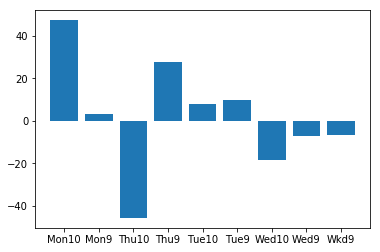

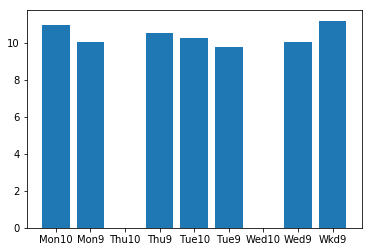

In [86]:
"""Problem with autosorting"""
xs = df5['timeLbel']
ys = df5['adjWSum'] 
xs, ys = zip(*sorted(zip(xs, ys)))
plt.bar(xs, ys)
#xs, ys = zip(*sorted(zip(xs, ys)))
plt.show()
plt.bar(df5['timeLbel'], df5['adjOpen'])
plt.show()

In [60]:
df5["daySum"] = df5.groupby('wkndLbel2')["adjWSum"].transform('sum')
df5["dayMean"] = df5.groupby('wkndLbel2')["adjWSum"].transform('mean')
df4 = df5[['daySum', 'dayMean', 'wkndLbel2']].drop_duplicates()
df4 = df4.reset_index(drop=True)
df4

,daySum,dayMean,wkndLbel2
0,50.504760,25.252380,Mon
1,17.473333,8.736667,Tue
2,-25.462500,-12.731250,Wed
3,-17.965299,-8.982650,Thu
4,-6.706359,-6.706359,Wkd


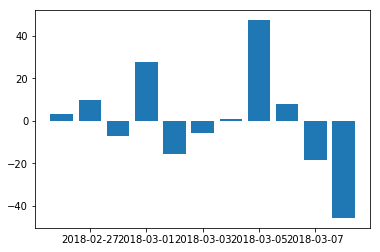

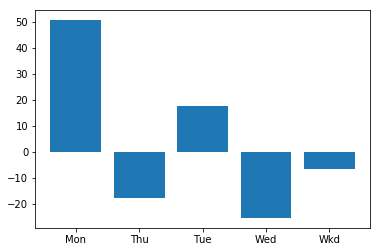

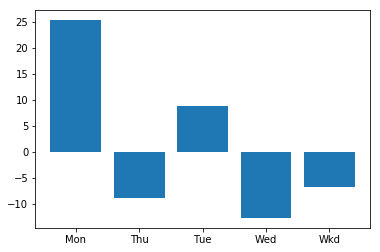

In [63]:
by_date = plt.bar(df2['Date Only'], df2['weightedSum'])
plt.show()
by_daySum = plt.bar(df5['wkndLbel2'], df5['daySum'])
plt.show()
by_dayMean = plt.bar(df5['wkndLbel2'], df5['dayMean'])
plt.show()

In [131]:
#hashtags = ['#guns since:2018-02-14', '#maga']

In [23]:
#targets = [hashtags]